# Visualization with Pandas (and Matplotlib)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# display plots in the notebook
%matplotlib inline

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [2]:
# read in the drinks data
drink_cols = ['country', 'beer', 'spirit', 'wine', 'liters', 'continent']
# url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv'
url = '../../2_dataset/drinks.csv'
drinks = pd.read_csv(url, header=0, names=drink_cols, na_filter=False)

In [3]:
drinks.head()

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


## Histogram: show the distribution of a numerical variable

In [4]:
# sort the beer column and mentally split it into 3 groups
drinks.beer.sort_values().values

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   1,   1,   1,   1,   2,   3,   5,   5,   5,   5,   5,
         6,   6,   6,   6,   8,   8,   8,   9,   9,   9,   9,  12,  13,
        15,  15,  16,  16,  17,  18,  19,  19,  20,  20,  21,  21,  21,
        21,  22,  23,  25,  25,  25,  25,  26,  28,  31,  31,  31,  31,
        32,  32,  34,  36,  36,  36,  37,  42,  42,  43,  44,  45,  47,
        49,  51,  51,  52,  52,  52,  53,  56,  56,  57,  58,  60,  62,
        62,  63,  64,  69,  71,  76,  76,  77,  77,  77,  78,  79,  82,
        82,  85,  88,  89,  90,  92,  93,  93,  98,  99, 102, 105, 106,
       109, 111, 115, 120, 122, 124, 127, 128, 130, 133, 140, 142, 143,
       144, 147, 149, 149, 152, 157, 159, 162, 163, 167, 169, 171, 173,
       185, 188, 192, 193, 193, 194, 194, 196, 197, 199, 203, 206, 213,
       217, 219, 224, 224, 225, 230, 231, 233, 234, 236, 238, 240, 245,
       245, 247, 249, 251, 261, 263, 263, 270, 279, 281, 283, 28

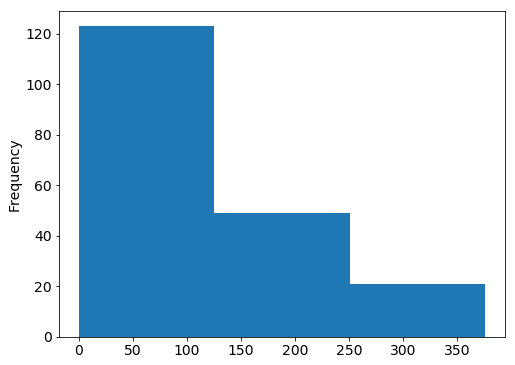

In [5]:
# compare with histogram
drinks.beer.plot(kind='hist', bins=3)

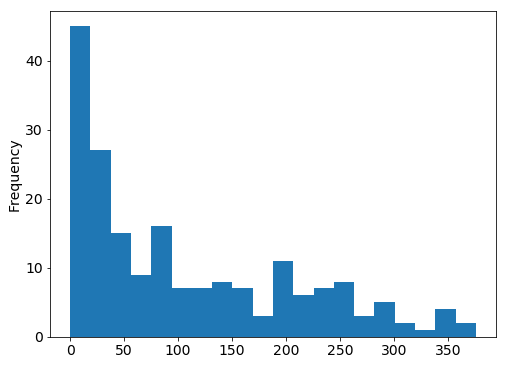

In [6]:
# try more bins
drinks.beer.plot(kind='hist', bins=20)

## Exercise 1:
Create 5 plots with different sizes of bins. 
Which one seems the represent the data most effectively without extra noise?

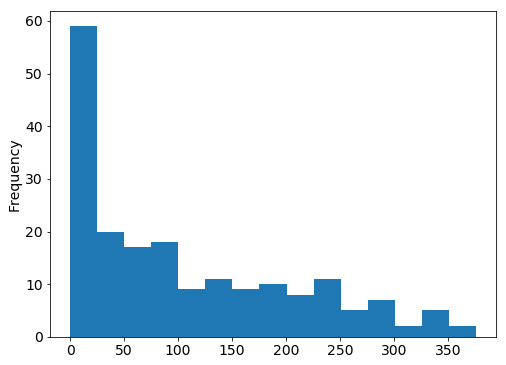

In [7]:
# Code for E1 here
drinks.beer.plot(kind='hist', bins=15)


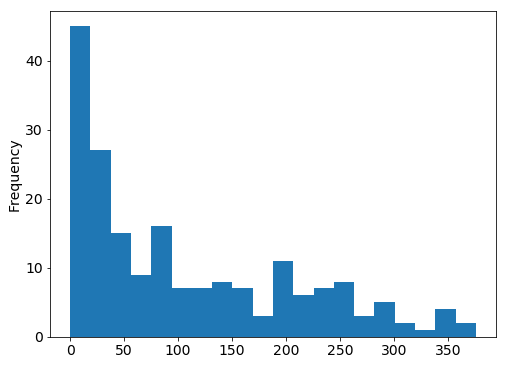

In [8]:
# add title and x/y axis labels
drinks.beer.plot(kind='hist', bins=20, label='Beer')


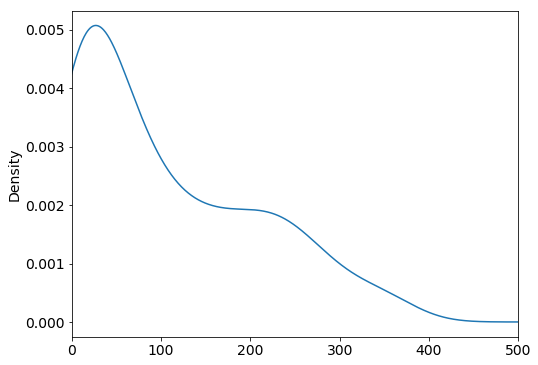

In [9]:
# compare with density plot (smooth version of a histogram)
drinks.beer.plot(kind='density', xlim=(0, 500))

## Scatter Plot: show the relationship between two numerical variables

In [10]:
# select the beer and wine columns and sort by beer
drinks[['beer','wine']].sort_values(by='beer', ascending=False)

,beer,wine
117,376,1
45,361,134
62,347,59
65,346,175
98,343,56
135,343,56
188,333,3
81,313,165
129,306,23
140,297,167


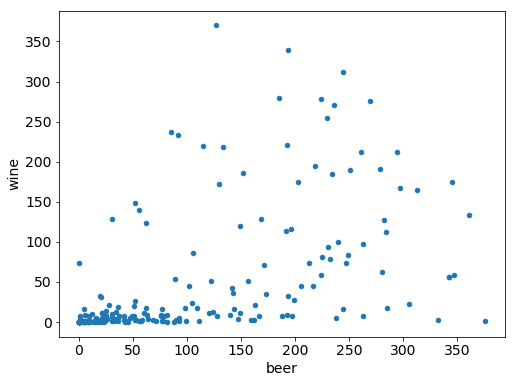

In [11]:
# compare with scatter plot
drinks.plot(x='beer',y='wine',kind='scatter')

Exercise 2: Change the the plot marker from a circle to 3 other shapes.

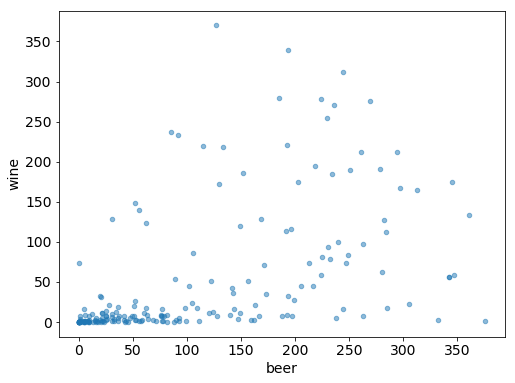

In [12]:
# add transparency, 'alpha'
drinks.plot(x='beer',y='wine',kind='scatter', alpha=0.5)

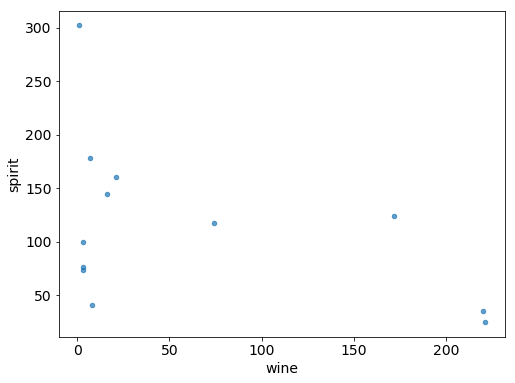

In [13]:
# create a scatter plot with different fields and transparency
drinks[drinks.continent=="SA"].plot(x='wine', y='spirit', alpha=0.7, kind='scatter')

In [14]:
drinks.columns.values

array(['country', 'beer', 'spirit', 'wine', 'liters', 'continent'], dtype=object)

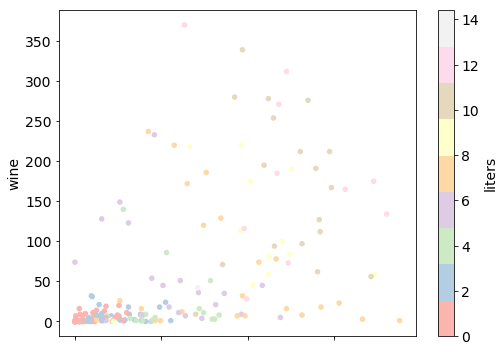

In [15]:
# vary point color by spirit servings
drinks.plot(x='beer',y='wine',kind='scatter', c='liters', colormap='Pastel1')

In [16]:
from pandas.plotting import scatter_matrix

/Users/austinlasseter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1ac34e80>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a1b0717b8>]], dtype=object)

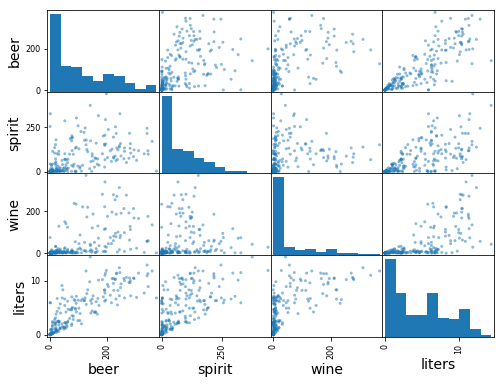

In [17]:
# scatter matrix of three numerical columns
pd.scatter_matrix(drinks)

/Users/austinlasseter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1b174898>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a1b433320>]], dtype=object)

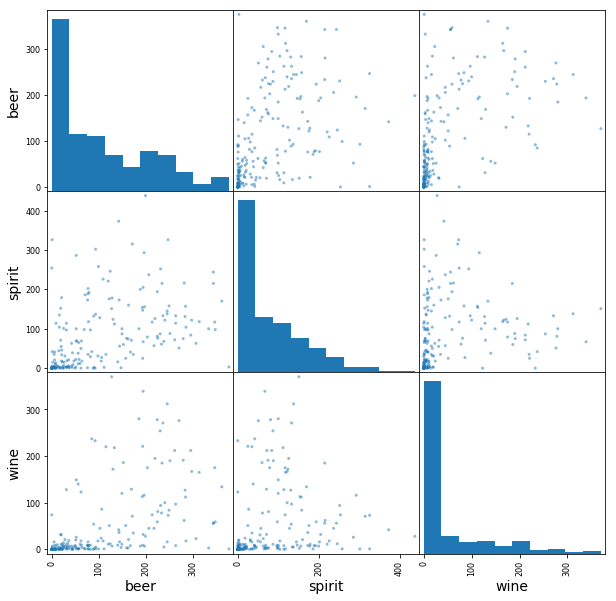

In [18]:
# increase figure size
pd.scatter_matrix(drinks[['beer', 'spirit', 'wine']], figsize=(10, 10))

Exercise 3: Choose one or two of the scatterplots above and describe some relationship between the alcohols you find.

In [19]:
#Type E3 code here



## Bar Plot: show a numerical comparison across different categories

In [20]:
# count the number of countries in each continent
drinks.continent.value_counts()

AF    53
EU    45
AS    44
NA    23
OC    16
SA    12
Name: continent, dtype: int64

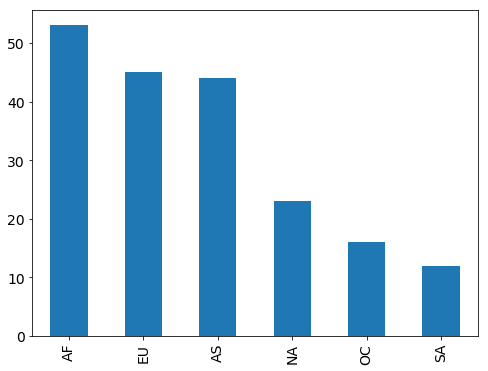

In [21]:
# compare with bar plot
drinks.continent.value_counts().plot(kind='bar')

In [22]:
# calculate the mean alcohol amounts for each continent
drinks.groupby('continent').mean()

,beer,spirit,wine,liters
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
NA,145.434783,165.739130,24.521739,5.995652
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


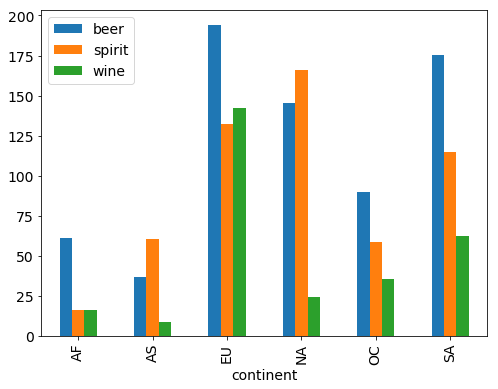

In [23]:
# side-by-side bar plots
drinks.drop('liters',axis=1).groupby('continent').mean().plot(kind='bar')

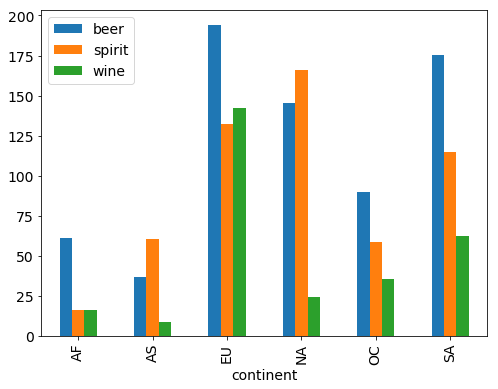

In [24]:
# drop the liters column
drinks.groupby('continent').mean().drop('liters', axis=1).plot(kind='bar')

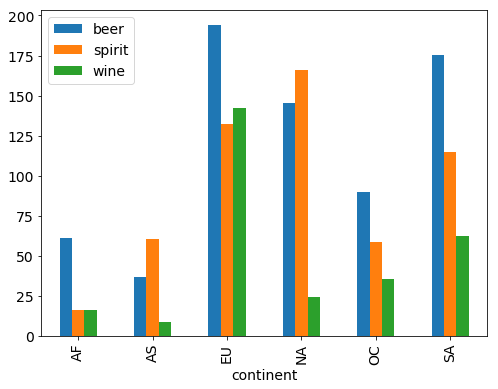

In [25]:
# stacked bar plots
drinks.groupby('continent').mean().drop('liters', axis=1).plot(kind='bar', stacked=False)

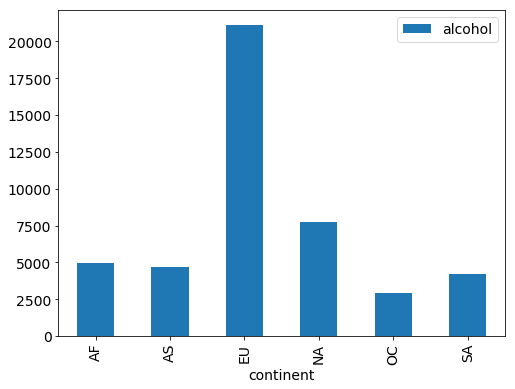

In [26]:
# E4 code here

# drinks.sort_values(by='beer',ascending=False).head(5).plot(x='country',kind='bar')


drinks['alcohol'] = drinks.beer + drinks.wine + drinks.spirit
drinks.groupby('continent').sum().drop(['beer','spirit','wine','liters'],axis=1).plot(kind='bar')

## Box Plot: show quartiles (and outliers) for one or more numerical variables

**Five-number summary:**

- min = minimum value
- 25% = first quartile (Q1) = median of the lower half of the data
- 50% = second quartile (Q2) = median of the data
- 75% = third quartile (Q3) = median of the upper half of the data
- max = maximum value

(More useful than mean and standard deviation for describing skewed distributions)

**Interquartile Range (IQR)** = Q3 - Q1

**Outliers:**

- below Q1 - 1.5 * IQR
- above Q3 + 1.5 * IQR

In [27]:
# sort the spirit column
drinks.spirit.sort_values().values

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   2,   2,   2,   2,   2,   2,   2,
         3,   3,   3,   3,   3,   3,   3,   3,   4,   4,   4,   5,   5,
         6,   6,   6,   7,   9,  11,  11,  12,  13,  15,  15,  16,  16,
        18,  18,  18,  18,  19,  21,  21,  22,  22,  25,  25,  27,  29,
        31,  31,  34,  35,  35,  35,  35,  38,  39,  41,  41,  42,  42,
        44,  46,  50,  51,  55,  56,  57,  60,  61,  63,  63,  65,  67,
        68,  69,  69,  69,  71,  71,  72,  74,  75,  76,  76,  79,  81,
        84,  87,  87,  88,  97,  97,  98,  98, 100, 100, 100, 100, 101,
       104, 104, 112, 114, 114, 114, 117, 117, 118, 118, 122, 122, 124,
       126, 128, 131, 132, 133, 133, 135, 137, 138, 145, 147, 151, 152,
       154, 156, 157, 158, 160, 170, 173, 173, 176, 178, 179, 186, 189,
       192, 194, 200, 202, 205, 215, 215, 216, 221, 226, 237, 24

In [28]:
# show "five-number summary" for spirit
drinks.spirit.describe()

count    193.000000
mean      80.994819
std       88.284312
min        0.000000
25%        4.000000
50%       56.000000
75%      128.000000
max      438.000000
Name: spirit, dtype: float64

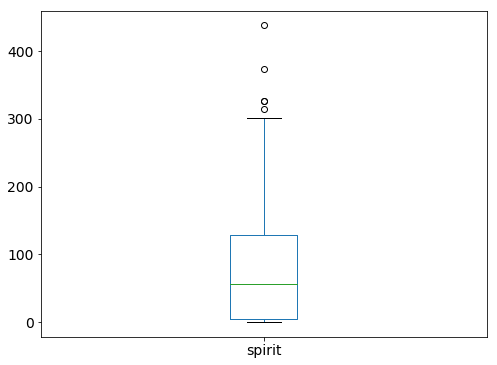

In [29]:
# compare with box plot
drinks.spirit.plot(kind='box')

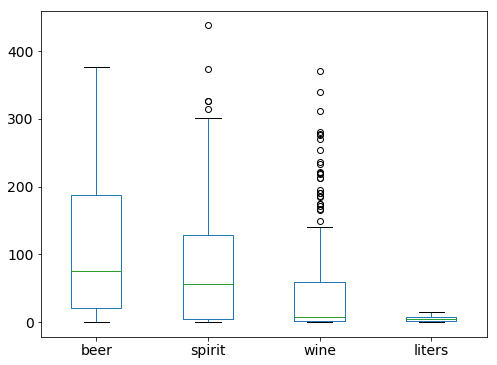

In [30]:
# include multiple variables
drinks.drop('alcohol',axis=1).plot(kind='box')

## Line Plot: show the trend of a numerical variable over time

In [31]:
# # read in the ufo data
# # url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/ufo.csv'
# url = '../../2_dataset/ufo.csv'
# ufo = pd.read_csv(url)
# ufo['Time'] = pd.to_datetime(ufo.Time)
# ufo['Year'] = ufo.Time.dt.year

In [32]:
a=1

In [33]:
# count the number of ufo reports each year (and sort by year)
# ufo.Year.value_counts().sort_index()

In [34]:
# compare with line plot
ufo.Year.value_counts().sort_index().plot(kind='line')

NameError: name 'ufo' is not defined

In [ ]:
# don't use a line plot when there is no logical ordering
# ufo.City.value_counts().plot(kind='bar')

## Grouped Box Plots: show one box plot for each group

In [ ]:
# reminder: box plot of beer servings
drinks.beer.plot(kind='box')

In [ ]:
# box plot of beer servings grouped by continent
drinks.boxplot(column='beer', by='continent')

In [ ]:
# box plot of all numeric columns grouped by continent
drinks.boxplot(by='continent')

## Grouped Histograms: show one histogram for each group

In [ ]:
# reminder: histogram of beer servings
drinks.beer.plot(kind='hist')

In [ ]:
# histogram of beer servings grouped by continent
drinks.hist(column='beer', by='continent')

In [ ]:
# share the x axes
drinks.hist(column='beer', by='continent', sharex=True)

In [ ]:
# share the x and y axes
drinks.hist(column='beer', by='continent', sharex=True, sharey=True)

In [ ]:
# change the layout
drinks.hist(column='beer', by='continent', sharex=True, layout=(2, 3))

## Assorted Functionality

In [ ]:
# saving a plot to a file
drinks.beer.plot(kind='hist', bins=20, title='Histogram of Beer Servings')
plt.xlabel('Beer Servings')
plt.ylabel('Frequency')
plt.savefig('beer_histogram.png')

In [ ]:
# list available plot styles
plt.style.available

In [ ]:
# change to a different style
plt.style.use('seaborn-dark')